In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
from xgboost import XGBClassifier

In [3]:
df=pd.read_csv(r'D:\All project set\Projects\ML Project\Heart Disease\heart_disease.csv')
print('Shape: ',df.shape)
df.head()

Shape:  (10000, 21)


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [4]:
drop_cols = [
    'Sugar Consumption',
    'CRP Level',
    'Homocysteine Level',
    'High Blood Pressure',
    'Low HDL Cholesterol',
    'High LDL Cholesterol'
]

# Drop if exists (safe)
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

print("Remaining Features:\n", df.columns.tolist())
print("Shape after feature removal:", df.shape)


Remaining Features:
 ['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI', 'Alcohol Consumption', 'Stress Level', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'Heart Disease Status']
Shape after feature removal: (10000, 15)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   Alcohol Consumption   7414 non-null   object 
 10  Stress Level          9978 non-null   object 
 11  Sleep Hours           9975 non-null   float64
 12  Triglyceride Level    9974 non-null   float64
 13  Fasting Blood Sugar   9978 non-null   float64
 14  Heart Disease Status  10000 non-null  object 
dtypes: float64(7), objec

In [6]:
print('Missing Values: \n',df.isnull().sum())

Missing Values: 
 Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Triglyceride Level        26
Fasting Blood Sugar       22
Heart Disease Status       0
dtype: int64


In [7]:
print('Duplicated values:',df.duplicated().sum())

Duplicated values: 0


In [8]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000


In [9]:
print('Features: \n',df.columns.tolist())

Features: 
 ['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI', 'Alcohol Consumption', 'Stress Level', 'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 'Heart Disease Status']


In [10]:
target_col = 'Heart Disease Status'
if df[target_col].dtype == object:
    df[target_col]=pd.factorize(df[target_col].str.strip().str.lower())[0]
df=df.dropna(subset=[target_col])
df.shape

(10000, 15)

In [11]:
X = df.drop(columns=[target_col], axis=1)
y = df[target_col]

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()


In [12]:
num_trans = Pipeline([
    ('Imputer',SimpleImputer(strategy = 'mean')),
    ('Scaler',StandardScaler())
])
cat_trans = Pipeline([
    ('Imputer',SimpleImputer(strategy = 'most_frequent')),
    ('Encode',OneHotEncoder(handle_unknown = 'ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_trans, num_cols),
    ('cat', cat_trans, cat_cols)
])

In [13]:
pipelines ={
    'LogisticRegression':Pipeline([
        ('preproc', preprocessor),
        ('clf', LogisticRegression(max_iter=1000,random_state=42))
    ]),
    'RandomForest':Pipeline([
        ('preproc',preprocessor),
        ('clf',RandomForestClassifier(random_state=42))
    ]),
    'XGBClassifier':Pipeline([
        ('preproc',preprocessor),
        ('clf',XGBClassifier(random_state=42))
    ])
}

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [15]:
param_grids = {
    'LogisticRegression': {"clf__C": [0.01, 0.1, 1, 10]},
    'RandomForest':{
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [5,10,15]},
    'XGBClassifier': {
        "clf__n_estimators": [100, 200],
        "clf__max_depth": [3, 5, 7],
        "clf__learning_rate": [0.05, 0.1]}
}

Tuning LogisticRegression 

CV_Score: 0.8000
Best Params: {'clf__C': 0.01}
Accuracy: 0.8000
ROC AUC: 0.5032
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2000
           1       0.00      0.00      0.00       500

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500



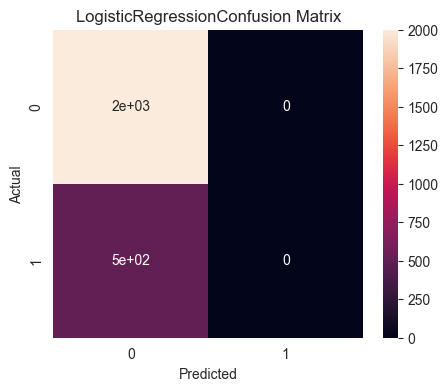

Tuning RandomForest 

CV_Score: 0.8000
Best Params: {'clf__max_depth': 5, 'clf__n_estimators': 100}
Accuracy: 0.8000
ROC AUC: 0.5083
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2000
           1       0.00      0.00      0.00       500

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500



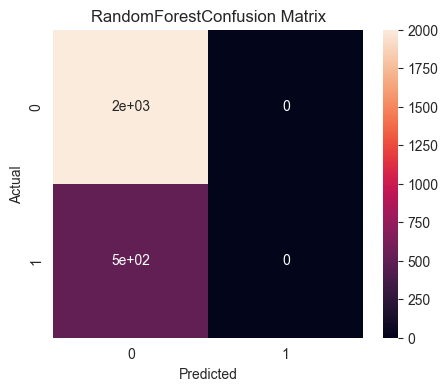

Tuning XGBClassifier 

CV_Score: 0.8000
Best Params: {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 100}
Accuracy: 0.8000
ROC AUC: 0.4958
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2000
           1       0.00      0.00      0.00       500

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500



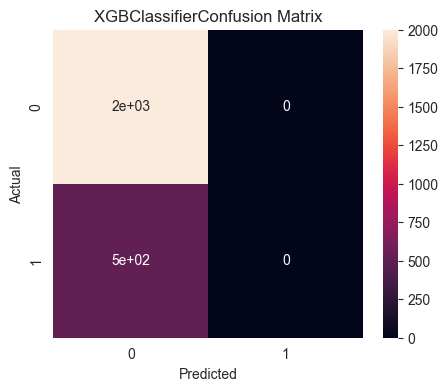

In [16]:
results = []
best_model = None
best_score = 0
best_name = None

for name, pipe in pipelines.items():
    grid = GridSearchCV(pipe, param_grids[name], cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test,y_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f'Tuning {name} \n')
    print(f'CV_Score: {grid.best_score_ :.4f}')
    print(f'Best Params: {grid.best_params_}')
    print(f'Accuracy: {acc:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'Classification Report: \n {classification_report(y_test, y_pred)}')

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True )
    plt.title(f'{name}Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    if roc_auc > best_score:
        best_model = model
        best_score = roc_auc
        best_name = name


    results.append({
        'Model':name,
        'Accuracy':acc,
        'ROC AUC':roc_auc,
        'CV_Score':grid.best_score_})


In [17]:
summary = pd.DataFrame(results)
print(summary)

                Model  Accuracy   ROC AUC  CV_Score
0  LogisticRegression       0.8  0.503223       0.8
1        RandomForest       0.8  0.508287       0.8
2       XGBClassifier       0.8  0.495778       0.8


In [18]:
print("\n Best Model:", best_name)
print(" Best ROC AUC:", best_score)


 Best Model: RandomForest
 Best ROC AUC: 0.508287


In [19]:
import joblib
save_path = r'D:\All project set\Projects\ML Project\Heart Disease\best_model.pkl'
joblib.dump(best_model,save_path)
print('Save Successfully')

Save Successfully
